In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
import sklearn
print(sklearn.__version__)

1.5.0


In [7]:
data = pd.read_csv('creditcard.csv')

In [8]:
pd.options.display.max_columns = None

# 1. Display Top 5 Rows of The Dataset

In [9]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


# 2. Check Last 5 Rows of The Dataset

In [10]:
data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,-1.593105,2.711941,-0.689256,4.626942,-0.924459,1.107641,1.991691,0.510632,-0.682920,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,-0.150189,0.915802,1.214756,-0.675143,1.164931,-0.711757,-0.025693,-1.221179,-1.545556,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,0.411614,0.063119,-0.183699,-0.510602,1.329284,0.140716,0.313502,0.395652,-0.577252,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,-1.933849,-0.962886,-1.042082,0.449624,1.962563,-0.608577,0.509928,1.113981,2.897849,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,-0.915427,-1.040458,-0.031513,-0.188093,-0.084316,0.041333,-0.302620,-0.660377,0.167430,-0.256117,0.382948,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


# 3. Find Shape of Our Dataset (Number of Rows And Number of Columns)

In [11]:
data.shape

(284807, 31)

In [12]:
print("Number of Rows",data.shape[0])
print("Number of Columns",data.shape[1])

Number of Rows 284807
Number of Columns 31


# 4. Get Information About Our Dataset Like Total Number Rows, Total Number of Columns, Datatypes of Each Column And Memory Requirement

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

# 5. Check Null Values In The Dataset

In [14]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

# Feature Scaling

In [15]:
from sklearn.preprocessing import StandardScaler

In [16]:
sc = StandardScaler()
data['Amount']=sc.fit_transform(pd.DataFrame(data['Amount']))

In [17]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403,0


In [18]:
data = data.drop(['Time'],axis=1)

In [19]:
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403,0


In [20]:
data.shape

(284807, 30)

In [21]:
data.duplicated().any()

True

# Let's Remove Duplicated Values

In [22]:
data = data.drop_duplicates()

In [23]:
data.shape

(275663, 30)

In [24]:
284807- 275663

9144

# 6. Not Handling Imbalanced

In [25]:
data['Class'].value_counts()

0    275190
1       473
Name: Class, dtype: int64

In [26]:
import seaborn as sns

<AxesSubplot:xlabel='Class', ylabel='count'>

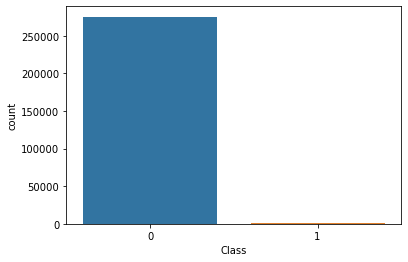

In [27]:
sns.countplot(data['Class'])

# 7. Store Feature Matrix In X And Response (Target) In Vector y

In [28]:
X = data.drop('Class',axis=1)
y = data['Class']

# 8. Splitting The Dataset Into The Training Set And Test Set

In [29]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,
                                                 random_state=42)

# 9. Handling Imbalanced Dataset

# Undersampling

In [30]:
normal = data[data['Class']==0]
fraud = data[data['Class']==1]

In [31]:
normal.shape

(275190, 30)

In [32]:
fraud.shape

(473, 30)

In [33]:
normal_sample=normal.sample(n=473)

In [34]:
normal_sample.shape

(473, 30)

In [35]:
new_data = pd.concat([normal_sample,fraud],ignore_index=True)

In [36]:
new_data['Class'].value_counts()

0    473
1    473
Name: Class, dtype: int64

In [37]:
new_data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-0.741366,-0.001125,2.331020,-2.035479,-0.523578,0.364534,-0.128175,0.255689,-1.112214,-0.248136,0.069226,0.441275,0.903878,-0.551223,-0.734325,-0.387219,-1.037013,2.000177,-1.132305,-0.389531,-0.314489,-0.488163,-0.264012,-0.500927,0.224003,0.508893,0.011929,0.049580,-0.231328,0
1,1.221058,0.288756,0.043537,0.521017,0.127611,-0.266347,0.064723,-0.072726,-0.038114,-0.353448,-0.220826,0.499965,0.983344,-0.423426,1.313729,0.316770,0.034934,-0.648584,-0.359291,-0.018253,-0.278519,-0.769812,0.068478,-0.497280,0.233644,0.154211,-0.005939,0.026113,-0.281304,0
2,2.160178,-1.842123,-0.231482,-1.705077,-1.625788,0.594255,-1.988585,0.313285,-0.704931,1.631843,0.104571,-0.492647,-0.024530,-0.635691,-0.426176,0.226930,-0.021457,0.944420,0.064065,-0.352934,-0.111270,0.079262,0.302230,0.173431,-0.546495,-0.266926,0.050625,-0.033871,-0.171316,0
3,1.917344,-1.019695,-0.464009,-0.268052,-0.858846,0.137518,-0.867246,0.100258,-0.427362,0.953529,0.812194,1.056139,0.832662,-0.081731,-0.319322,-0.968494,-0.511831,1.294539,-0.697968,-0.397112,-0.509456,-1.103525,0.473758,0.648730,-0.734322,-0.120878,-0.007064,-0.023695,-0.025386,0
4,2.019889,-0.001564,-1.554181,0.741646,0.013831,-1.080603,0.052724,-0.214598,1.171023,-0.638909,-0.869910,-0.105656,-0.961015,-1.008165,-0.206325,-0.281491,0.939375,0.203581,-0.058009,-0.283740,0.017479,0.371263,0.007692,-0.166811,0.242662,-0.132991,0.012654,-0.033125,-0.337237,0


In [38]:
X = new_data.drop('Class',axis=1)
y = new_data['Class']

In [39]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,
                                                 random_state=42)

# 10. Logistic Regression

In [40]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()
log.fit(X_train,y_train)

LogisticRegression()

In [41]:
y_pred1 = log.predict(X_test)

In [42]:
from sklearn.metrics import accuracy_score

In [43]:
accuracy_score(y_test,y_pred1)

0.9315789473684211

In [44]:
from sklearn.metrics import precision_score,recall_score,f1_score

In [45]:
precision_score(y_test,y_pred1)

0.9494949494949495

In [46]:
recall_score(y_test,y_pred1)

0.9215686274509803

In [47]:
f1_score(y_test,y_pred1)

0.9353233830845771

# 11. Decision Tree Classifier

In [48]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [49]:
y_pred2 = dt.predict(X_test)

In [50]:
accuracy_score(y_test,y_pred2)

0.9052631578947369

In [51]:
precision_score(y_test,y_pred2)

0.8888888888888888

In [52]:
recall_score(y_test,y_pred2)

0.9411764705882353

In [53]:
f1_score(y_test,y_pred2)

0.9142857142857143

# 12. Random Forest Classifier

In [54]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier()

In [55]:
y_pred3 = rf.predict(X_test)

In [56]:
accuracy_score(y_test,y_pred3)

0.9473684210526315

In [57]:
precision_score(y_test,y_pred3)

0.9791666666666666

In [58]:
recall_score(y_test,y_pred3)

0.9215686274509803

In [59]:
f1_score(y_test,y_pred3)

0.9494949494949495

In [60]:
final_data = pd.DataFrame({'Models':['LR','DT','RF'],
              "ACC":[accuracy_score(y_test,y_pred1)*100,
                     accuracy_score(y_test,y_pred2)*100,
                     accuracy_score(y_test,y_pred3)*100
                    ]})

In [61]:
final_data

,Models,ACC
0,LR,93.157895
1,DT,90.526316
2,RF,94.736842


<AxesSubplot:xlabel='Models', ylabel='ACC'>

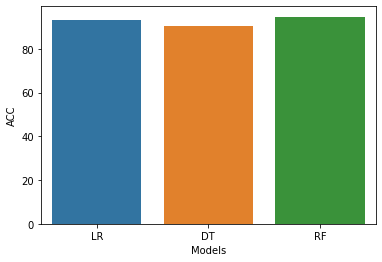

In [62]:
sns.barplot(final_data['Models'],final_data['ACC'])

# Oversampling

In [63]:
X = data.drop('Class',axis=1)
y = data['Class']

In [64]:
X.shape

(275663, 29)

In [65]:
y.shape

(275663,)

In [95]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.


In [102]:
pip install --upgrade scikit-learn imbalanced-learn


  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.12.2
    Uninstalling imbalanced-learn-0.12.2:
      Successfully uninstalled imbalanced-learn-0.12.2
Note: you may need to restart the kernel to use updated packages.


In [103]:
from imblearn.over_sampling import SMOTE

In [105]:
X_res,y_res = SMOTE().fit_resample(X,y)

In [106]:
import sklearn
print(sklearn.__version__)

1.5.0


In [107]:
y_res.value_counts()

0    275190
1    275190
Name: Class, dtype: int64

In [108]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_res,y_res,test_size=0.20,
                                                 random_state=42)

# 10. Logistic Regression

In [109]:
log = LogisticRegression()
log.fit(X_train,y_train)

LogisticRegression()

In [110]:
y_pred1 = log.predict(X_test)

In [114]:
accuracy_score(y_test,y_pred1)

0.944701842363458

In [115]:
precision_score(y_test,y_pred1)

0.972855927615807

In [116]:
recall_score(y_test,y_pred1)

0.9148591894987547

In [117]:
f1_score(y_test,y_pred1)

0.9429666344973624

# 11. Decision Tree Classifier

In [118]:
dt=DecisionTreeClassifier()
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [119]:
y_pred2 = dt.predict(X_test)

In [120]:
accuracy_score(y_test,y_pred2)

0.9981649042479741

In [121]:
precision_score(y_test,y_pred2)

0.9971694518534647

In [122]:
recall_score(y_test,y_pred2)

0.9991636819809828

In [123]:
f1_score(y_test,y_pred2)

0.9981655708525555

# 12. Random Forest Classifier

In [124]:
rf = RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier()

In [125]:
y_pred3 = rf.predict(X_test)

In [126]:
accuracy_score(y_test,y_pred3)

0.999918238308078

In [127]:
precision_score(y_test,y_pred3)

0.9998363993310551

In [128]:
recall_score(y_test,y_pred3)

1.0

In [129]:
f1_score(y_test,y_pred3)

0.9999181929736854

In [130]:
final_data = pd.DataFrame({'Models':['LR','DT','RF'],
              "ACC":[accuracy_score(y_test,y_pred1)*100,
                     accuracy_score(y_test,y_pred2)*100,
                     accuracy_score(y_test,y_pred3)*100
                    ]})

In [131]:
final_data

,Models,ACC
0,LR,94.470184
1,DT,99.816490
2,RF,99.991824


<AxesSubplot:xlabel='Models', ylabel='ACC'>

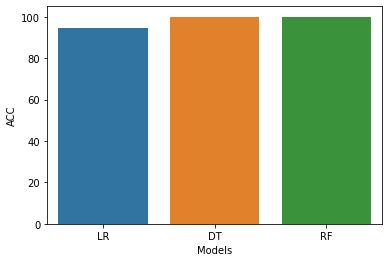

In [132]:
sns.barplot(final_data['Models'],final_data['ACC'])

# Save The Model

In [133]:
rf1 = RandomForestClassifier()
rf1.fit(X_res,y_res)

RandomForestClassifier()

In [134]:
import pickle

In [135]:
with open('classifier111.pkl','wb') as file:
    pickle.dump(rf1,file)

In [137]:
with open('classifier111.pkl','rb') as file:
    cls=pickle.load(file)

In [138]:
pred = cls.predict([[0.99,1,1,1,1,1,1.0,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1]])
pred

array([0], dtype=int64)

In [139]:
if pred == 0:
    print("Normal Transcation")
else:
    print("Fraudulent Transcation")

Normal Transcation
